
### Setup (10 minutes)

You will start working on Tasks 3-5 at 9.10am. Spend the 10 minutes for the setup to:

1. Replace CID in the file name with your CID, e.g. 123456_Coursework2_Part2.ipynb
2. Read and execute the following sections:

- **[S1](#s1). Package Imports** <a name="index-s1"></a>
- **[S2](#s2). Queries on Documentation** <a name="index-s2"></a>
- **[S3](#s3). Dataset Loading** <a name="index-s3"></a>



<a name="s1"></a>

## S1. Package Imports [(index)](#index-s1)

In [47]:
# Required imports - please stick to these imports only

import numpy as np
import matplotlib.pyplot as plt

# Initial global plotting configuration
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<a name="s2"></a>

## S2. Queries on Documentation [(index)](#index-s2)

Documentation of common Python libraries (*e.g.*, np.linalg.eig) can be accessed locally quicker than using the Web by executing the following expression in an arbitrary cell.

```python
?np.linalg.eig # this will display the documentation. Press [x] button to close the documentation dialogue.
```

In [48]:
# Example: uncomment the line below (CTRL+/) and execute (SHIFT+Enter)
# to get the documentation of `np.linalg.eig` function for Eigen decomposition.
# Press the [x] button to close the documentation dialogue.

# ?np.linalg.eig

<a name="s3"></a>

## S3. Dataset Loading [(index)](#index-s3)

#### Dataset (just for reference, same as in Part 1)
> In this coursework, you will work with a dataset of images of stars measured with the Euclid telescope of the European Space Agency. The training dataset comprises 648 images of stars (32 x 32 pixels) and the test set includes 32 images of stars (32 x 32 pixels). The stars in the dataset belong to four stellar classes: O5V, A0V, F5V and M5V. The first letter in the code denotes the spectral type (from hottest to coolest: O, B, A, F, G, K, M); the second digit represents the spectral subtype (from hottest to coolest: 1-9); the third letter V indicates that all the stars in our dataset are dwarf stars.

> The high-quality embeddings are 180-dimensional vectors, one for each star image, that were computed using a deep neural network able to classify images into the 4 classes with high accuracy.

####  In the next cell, the dataset is loaded for you into the following arrays:

- `star_images_train`: `(N, 32, 32)` array containing `N`=648 images of size of 32x32 each, to use for training.
- `star_embeddings_train`: `(N, p)` array containing `N`=648 embeddings (each with `p`=180 dimensions), one for each training sample in `star_images_train`.
- `star_classes_train`: `(N,)` array containing `N`=648 integer labels (the star image class, with number of classes `n_classes` = 4), one label for each training sample.


- `star_images_test`: `(N, 32, 32)` array containing `N`=32 images of size of 32x32 each, to use for testing.
- `star_embeddings_test`: `(N, p)` array, containing `N`=32 embeddings (each with `p`=180 dimensions), one for each test sample in `star_images_test`.
- `star_classes_test`: `(N,)` array containing `N`=32 class labels, one for each test sample.

In [49]:
def load_data(path):
    BASE_URL = "https://github.com/barahona-research-group/mfds-resources/raw/main/datasets/cw2/data"
    return np.load(np.DataSource().open(f"{BASE_URL}/{path}.npy").name)

star_images_train = load_data("training/star_images_train")
star_embeddings_train = load_data("training/star_embeddings_train")
star_classes_train = load_data("training/star_classes_train")

star_images_test = load_data("test/star_images_test")
star_embeddings_test = load_data("test/star_embeddings_test")
star_classes_test = load_data("test/star_classes_test")



## Coursework 2 Part 2 (90 minutes)

###  Tasks Outline

- [Task 3](#task-3): k-means clustering (20 marks) <a name="index-task-3"></a>
  - [(3.1)](#task-31) <a name="index-task-31"></a>
  - [(3.2)](#task-32) <a name="index-task-32"></a>
  - [(3.3)](#task-33) <a name="index-task-33"></a>
- [Task 4](#task-4): Gaussian Naive Bayes Classifier (15 marks) <a name="index-task-4"></a>
  - [(4.1)](#task-41) <a name="index-task-41"></a>
  - [(4.2)](#task-42) (3rd-year students only)  <a name="index-task-42"></a>
  - [(4.2)](#task-42m)  (MSc/4th-year students only) <a name="index-task-42m"></a>
- [Task 5](#task-5): Soft-margin linear SVM classifier (15 marks) <a name="index-task-5"></a>
  - [(5.1)](#task-51) <a name="index-task-51"></a>
  - [(5.2)](#task-52) (3rd-year students only) <a name="index-task-52"></a>
  - [(5.2)](#task-52m) (MSc/4th-year students only) <a name="index-task-52m"></a>

If you have troubles visualising the text and the images describing the tasks, you can download a PDF with the tasks' description at this [link](https://drive.google.com/file/d/1RZd_9NssPKGHNr0WxEVm0o97to6ETq1D/view?usp=sharing).

Recommendation: if there are tasks where you get stuck, try to carry on as much as you can with the following tasks.

<a name="task-3"></a>

## Task 3:   k-means clustering (15 marks) [(index)](#index-task-3)


<a name="task-31"></a>

### **3.1 (8 marks)**   [(index)](#index-task-31)


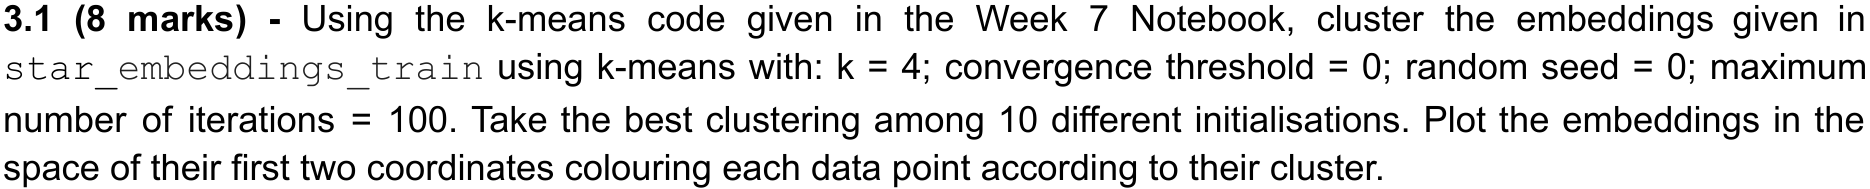

In [50]:
# code from the notebooks
def standardise(X):
    """
    Standardise features.

    Parameters:
        X (np.array): Feature matrix.

    Returns:
        X_std (np.array): Standardised feature matrix
    """

    mu = np.mean(X, axis=0, keepdims=True)
    sigma = np.std(X, axis=0, keepdims=True)
    X_std = (X - mu) / sigma

    return X_std

def compute_within_distance(centroids, X, labels):
    """
    Compute the within-cluster distance.

    Parameters:
        centroids (np.ndarray): Centroids matrix, shape (k, p).
        X (np.ndarray): Samples matrix, shape (N, p).
        labels (np.ndarray): Cluster index of each sample, shape (N,).

    Retruns:
        within_distance (float): Within-cluster distance.
    """

    within_distance = 0.0
    K, p = centroids.shape

    # calculate the contribution to W(C) for each cluster
    for l in range(len(centroids)):
        centroid = centroids[l]
        # skip empty clusters
        if np.isinf(centroid).any():
            continue

        # Select samples belonging to label=l.
        X_cluster = X[labels == l]

        # We need to add the `X_cluster` contribution to `within_distance`
        # Compute the W(C) contribution for each sample
        cluster_se = (X_cluster - centroid) ** 2
        assert cluster_se.shape == (len(X_cluster), p)
        # Calculate the total contribution for the lth cluster
        # and add to  the running total
        within_distance += np.sum(cluster_se)

    return within_distance

def compute_centroids(K, X, labels):
    """
    Compute the centroids of the clustered points X.

    Parameters:
        K (int): The number of clusters.
        X (np.ndarray): Samples matrix, shape (N, p).
        labels (np.ndarray): Cluster index of each sample, shape (N,).

    Returns:
        centroids (np.ndarray): Centroids matrix, shape (k, p).
    """
    N, p = X.shape

    centroids = np.zeros((K, p))

    # EDIT THE NEXT LINES
    for label in range(K):
        cluster_X_l = X[labels == label]
        # if cluster is empty, set all features values to Inf
        if cluster_X_l.shape[0] == 0:
          centroids[label] = np.Inf
        else:
          centroids[label] = cluster_X_l.mean(axis=0)


    return centroids

def kmeans_assignments(centroids, X):
    """
    Assign every sample  the index of the closest centroid.

    Parameters:
        centroids (np.ndarray): Centroids matrix, shape (k, p).
        X (np.ndarray): Samples matrix, shape (N, p).

    Returns:
        labels (np.ndarray): Cluster index of each sample, shape (N,).
    """
    K, p = centroids.shape
    N, _ = X.shape

    # Compute distances between data points and centroids. Assumed shape: (k, N).
    distances = np.vstack([np.linalg.norm(X - c, axis=1) for c in centroids])
    assert distances.shape == (K, N), f"Unexpected shape {distances.shape} != {(K, N)}"

    labels = np.argmin(distances, axis=0)

    return labels

def kmeans_clustering(X, K, rng,
                      max_iters=1000,
                      epsilon=0.0,
                      callback=None,
                      print_empty=False):
    """
    Apply k-means clustering algorithm on the samples in `X` to discover
    k clusters.

    Parameters:
        X (np.ndarray): Samples matrix, shape (N, p).
        K (int): The number of clusters.
        rng (np.random.default_rng): A random number generator.
        max_iters (int): Maximum number of iterations.
        epsilon (float): The convergence threshold.
        callback (Callable): Function to be called on the labels and centroids.
        print_empty (bool): Whether to print the number of empty clusters.

    Returns:
        labels (np.ndarray): Cluster index of each sample, shape (N,).
        centroids (np.ndarray): Centroids matrix, shape (k, p).
        within_distance (float): Within-cluster distance.
    """
    # Step 0: randomly initialise the cluster assignments.
    labels = rng.choice(K, size=len(X), replace=True)
    # initialise within_distance
    within_distance = np.inf

    for _ in range(max_iters):
        # Step 1: compute the centroids
        centroids = compute_centroids(K, X, labels)

        if callback != None:
            callback(labels, centroids)

        # Step 2: reassignments.
        new_labels = kmeans_assignments(centroids, X)

        # Step 3: termination check
        _within_distance = compute_within_distance(centroids, X, labels)
        if all(labels == new_labels) or abs(_within_distance - within_distance) < epsilon:
            break

        labels = new_labels
        within_distance = _within_distance


    num_empty = K - len(np.unique(labels))
    if (num_empty != 0) & print_empty :
      print(num_empty, 'empty cluster(s) present.')

    return labels, centroids, within_distance

def kmeans_clustering_multi_runs(X, K, max_iters=100,
                                 epsilon=0.0,
                                 n_runs=100, seed=0):
    """
    Perform multiple runs (with different initialisations) of kmeans algorithm
    and return the best clustering using the within-cluster distance.

    Parameters:
        X (np.ndarray): Samples matrix, shape (N, p).
        K (int): The number of clusters.
        max_iters (int): Maximum number of iterations.
        epsilon (float): The convergence threshold.
        n_runs (int): The number of runs of kmeans with different initialisations.
        seed (int): A seed value before starting the n_runs loop.

    Returns:
        labels (np.ndarray): Cluster index of each sample, shape (N,).
        centroids (np.ndarray): Centroids matrix, shape (k, p).
        intermediates (list): The clustering trajectory for the best clustering.
        within_distance (float): Within-cluster distance.
    """
    # We fix the seed once before starting the n_runs.
    rng = np.random.default_rng(seed=seed)
    min_within_distance = np.inf
    best_clustering = (None, None, None)

    for _ in range(n_runs):

        # define callback function
        intermediates = []
        callback = lambda labels, centroids: intermediates.append((labels, centroids))

        labels, centroids, within_distance = kmeans_clustering(X, K, rng,
                                                    max_iters=max_iters,
                                                    epsilon=epsilon,
                                                    callback=callback)

        if within_distance < min_within_distance:
            # store results so they are not overwritten
            best_clustering = labels, centroids, intermediates
            min_within_distance = within_distance

    labels, centroids, intermediates = best_clustering
    return labels, centroids, intermediates, min_within_distance

In [51]:
# standardise data
star_embeddings_train_std = standardise(star_embeddings_train)
kmeans_labels, kmeans_centroids, _, _ = kmeans_clustering_multi_runs(star_embeddings_train,
                                                                     K=4,
                                                                     max_iters=100,
                                                                     epsilon=0.0,
                                                                     n_runs=10)

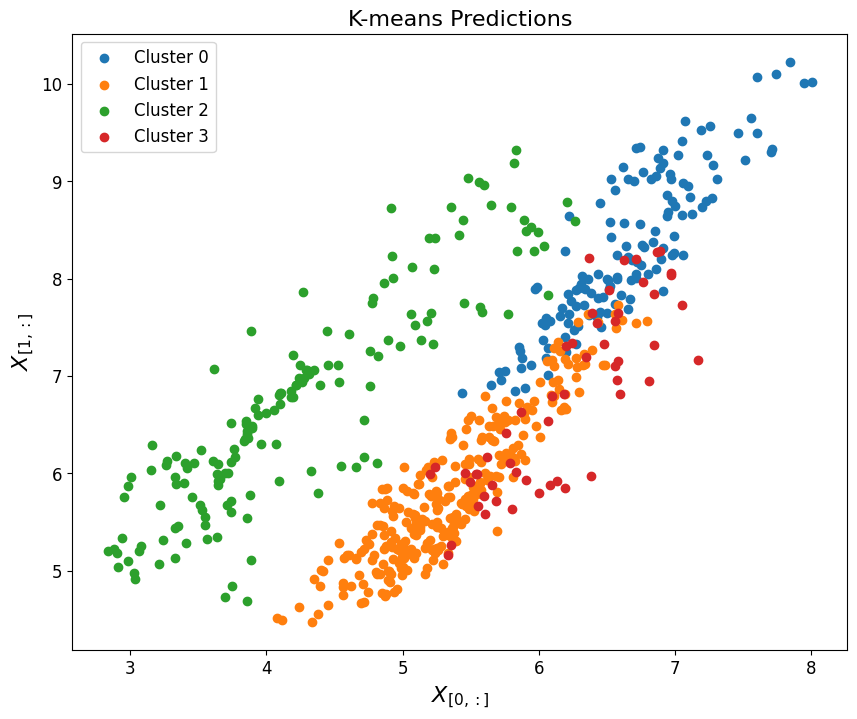

In [55]:
fig = plt.figure(figsize=(10, 8))
for label in np.unique(kmeans_labels):
    plt.scatter(star_embeddings_train[kmeans_labels == label, 0],
                star_embeddings_train[kmeans_labels == label, 1],
                label=f'Cluster {label}')
plt.legend()
plt.title('K-means Predictions')
plt.xlabel('$X_{[0,:]}$')
plt.ylabel('$X_{[1,:]}$')
plt.show()

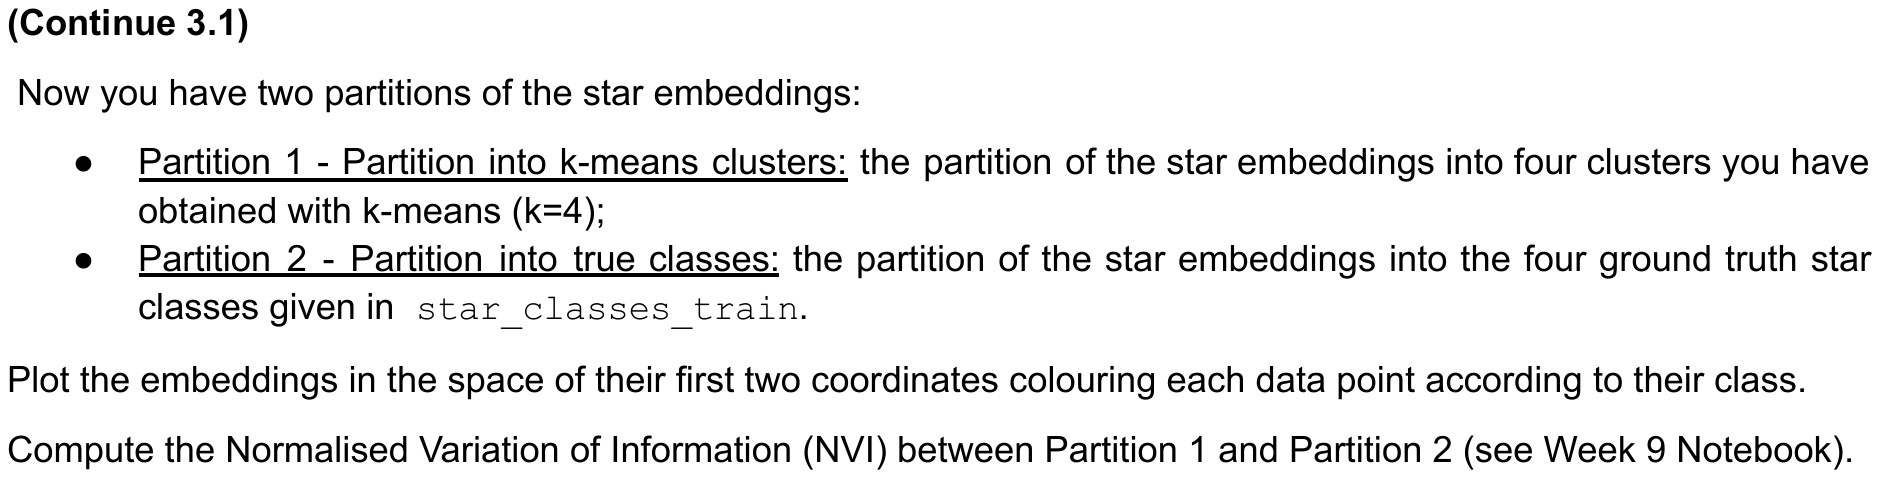

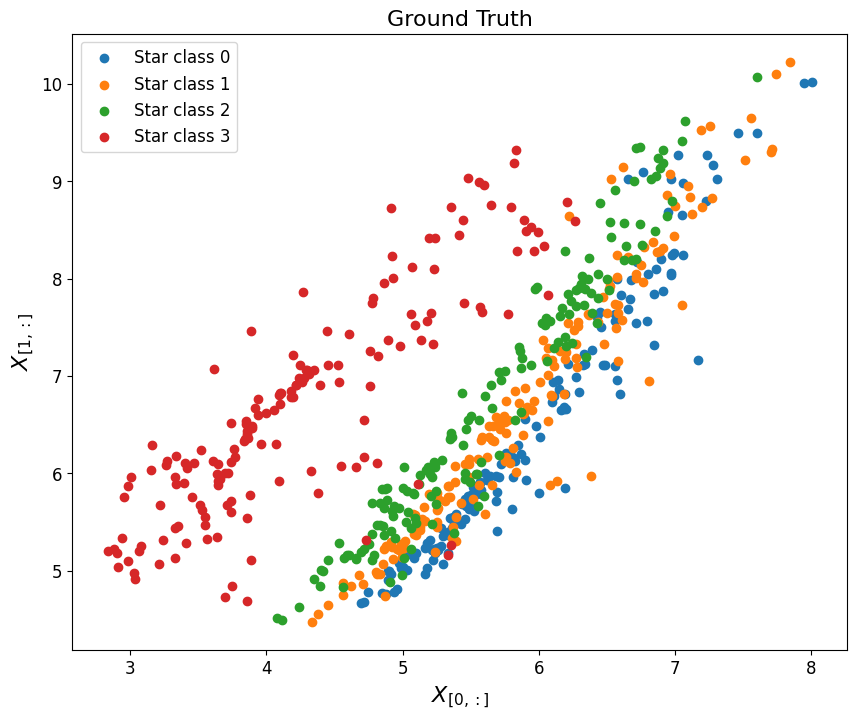

In [58]:
fig = plt.figure(figsize=(10, 8))
for label in np.unique(star_classes_train):
    plt.scatter(star_embeddings_train[star_classes_train == label, 0],
                star_embeddings_train[star_classes_train == label, 1],
                label=f'Star class {label}')
plt.legend()
plt.title('Ground Truth')
plt.xlabel('$X_{[0,:]}$')
plt.ylabel('$X_{[1,:]}$')
plt.show()

In [59]:
def compute_NVI(partition_1,partition_2):
    """Computes NVI of two partitions.

    Parameters:
        partition_1 (np.array): Encoding for partition 1.
        partition_2 (np.array): Encoding for partition 2.

    Returns:
        NVI (float): NVI of the two partitions.
    """
    # check if partitions are defined on the same underlying space
    assert len(partition_1) == len(partition_2), "Partition arrays must have same length"

    # get number of points
    N = len(partition_1)

    # get communities as sets from partition 1
    communities_1 = []
    for index in np.unique(partition_1):
        community = set(np.where(partition_1 == index)[0])
        communities_1.append(community)

    # get communities as sets from partition 2
    communities_2 = []
    for index in np.unique(partition_2):
        community = set(np.where(partition_2 == index)[0])
        communities_2.append(community)

    # compute number of communities
    n1 = len(communities_1)
    n2 = len(communities_2)

    # compute probabilities for the two partitions
    p1 = np.asarray([len(community) for community in communities_1]) / N
    p2 = np.asarray([len(community) for community in communities_2]) / N

    # compute joint probabilities
    p12 = np.zeros((n1, n2))
    for i in range(n1):
        for j in range(n2):
            p12[i, j] = len(communities_1[i].intersection(communities_2[j])) / N

    # compute entropy
    E1 = - np.sum(p1 * np.log(p1))
    E2 = - np.sum(p2 * np.log(p2))

    # compute mutual information
    MI = 0
    for i in range(n1):
        for j in range(n2):
            if p12[i, j] > 0:
                MI += p12[i, j] * np.log(p12[i, j] / (p1[i] * p2[j]))

    # compute NVI
    NVI = (E1 + E2 - 2 * MI) / (E1 + E2 - MI)

    return NVI

In [60]:
print("The NVI between the K-means predictions and the true classes is: " +
      str(compute_NVI(kmeans_labels, star_classes_train)))

The NVI between the K-means predictions and the true classes is: 0.7418303795690306


<a name="task-32"></a>

### **3.2 (7 marks)**   [(index)](#index-task-32)


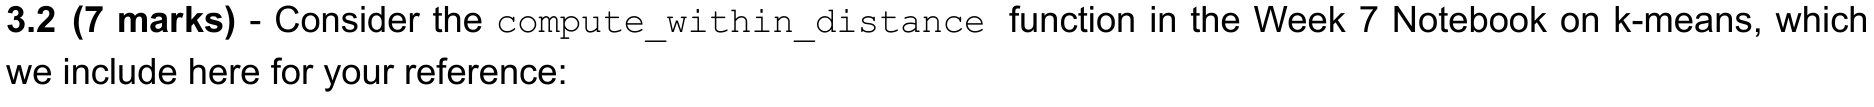

In [61]:
def compute_within_distance(centroids, X, labels):
    """
    Compute the within-cluster distance.

    Parameters:
        centroids (np.ndarray): Centroids matrix, shape (k, p).
        X (np.ndarray): Samples matrix, shape (N, p).
        labels (np.ndarray): Cluster index of each sample, shape (N,).

    Retruns:
        within_distance (float): Within-cluster distance.
    """

    within_distance = 0.0
    K, p = centroids.shape

    # calculate the contribution to W(C) for each cluster
    for l in range(len(centroids)):
        centroid = centroids[l]
        # skip empty clusters
        if np.isinf(centroid).any():
            continue

        # Select samples belonging to label=l.
        X_cluster = X[labels == l]

        # We need to add the `X_cluster` contribution to `within_distance`
        # Compute the W(C) contribution for each sample
        cluster_se = (X_cluster - centroid) ** 2
        assert cluster_se.shape == (len(X_cluster), p)
        # Calculate the total contribution for the lth cluster
        # and add to  the running total
        within_distance += np.sum(cluster_se)

    return within_distance

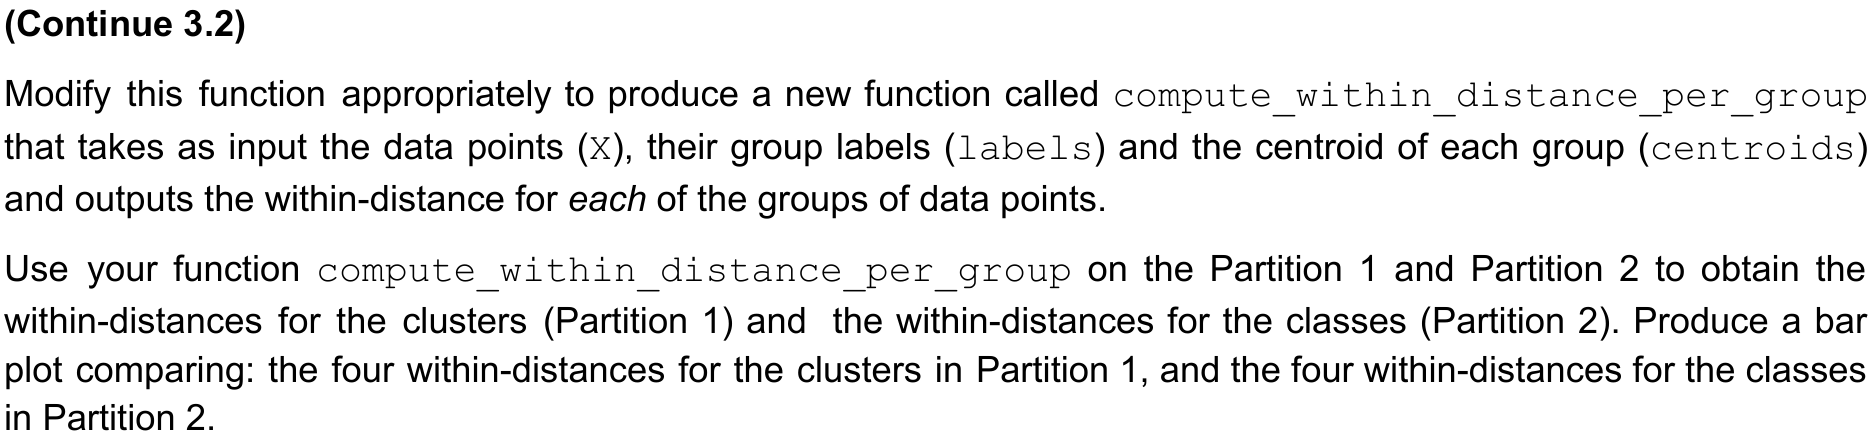

In [62]:
def compute_within_distance_per_class(centroids, X, labels):
    """
    Compute the within-cluster distance.

    Args:
        centroids (np.ndarray): the centroids array, with shape (k, p).
        X (np.ndarray): the samples array, with shape (N, p).
        labels (np.ndarray): the cluster index of each sample, with shape (N,).

    Retruns:
        (List[float]): a list of the within-cluster distance per class.
    """
    within_distance = []
    k, p = centroids.shape

    for l in range(len(centroids)):
        centroid = centroids[l]
        # skip empty clusters
        if np.isinf(centroid).any():
            continue

        # Select samples belonging to label=l.
        X_cluster = X[labels == l]

        # We need to add the `X_cluster` contribution to `within_distance`
        # Compute the W(C) contribution for each sample
        cluster_se = (X_cluster - centroid) ** 2
        assert cluster_se.shape == (len(X_cluster), p)
        # append to within_distance rather than adding to running total
        within_distance.append(np.sum(cluster_se))

    return within_distance

First we need to find the centroids of the different partitions and then we can calculate the within class distance.

In [12]:
embeddings_kmeans_centroids = compute_centroids(4,
                                                star_embeddings_train_std,
                                                kmeans_labels)
embeddings_gtruth_centroids = compute_centroids(4,
                                                star_embeddings_train_std,
                                                star_classes_train)

kmeans_within_distance = compute_within_distance_per_class(embeddings_kmeans_centroids,
                                                           star_embeddings_train_std,
                                                           kmeans_labels)
gtruth_within_distance = compute_within_distance_per_class(embeddings_gtruth_centroids,
                                                           star_embeddings_train_std
                                                           , kmeans_labels)

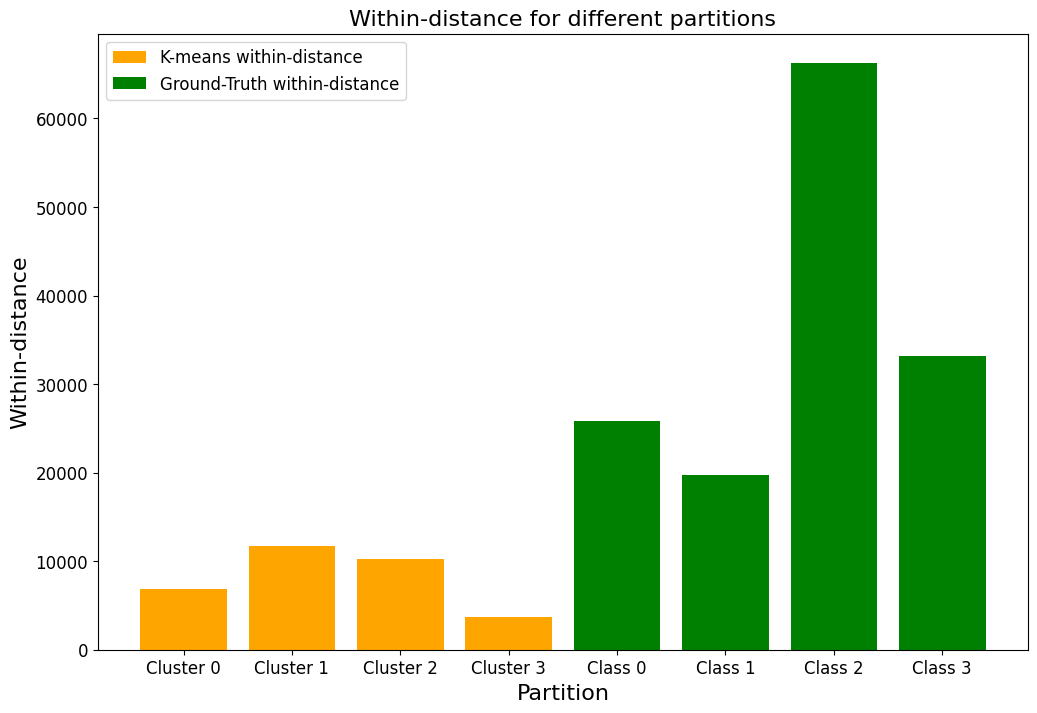

In [13]:
fig = plt.figure(figsize=(12, 8))
plt.bar([f'Cluster {i}' for i in range(len(kmeans_within_distance))],
            kmeans_within_distance, color="orange",
            label="K-means within-distance")

plt.bar([f'Class {i}' for i in range(len(gtruth_within_distance))],
            gtruth_within_distance, color="green",
            label='Ground-Truth within-distance')
plt.ylabel("Within-distance")
plt.xlabel("Partition")
plt.title("Within-distance for different partitions")
plt.legend()
plt.show()

<a name="task-33"></a>

### **3.3 (5 marks)**   [(index)](#index-task-33)


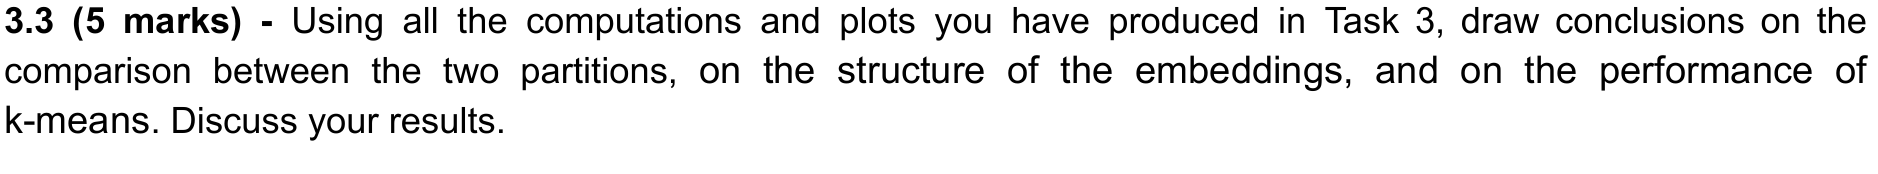

Visually, the plots of the first feature of (standardised) $X$ against the second feature of (standardised) $X$ for partition 1 and partition 2 show that some aspect of the clusters obtained are similar, notably the green (respectively, red) cluster in partition 1 (respectively,2). However, the remaining clusters in partition 1 do not appear to be of similar shape to the true classes. Particularly, those returned by K-means appear to be more separable and rounder in shape (in the two dimensions considered at least).


The NVI between the clustering obtained from $K$-means and the ground truth classes is quite poor (0.73). This means $K$-means has not recovered well the ground-truth, although it has captured some of the structure.


Interestingly, the within-cluster distances for the clusters obtained from $K$-means is significantly lower than those obtained from the ground-truth assignment (which is expected, since $K$-means is designed to minimise such a distance). A possible explanation for this is that the geometry of the embeddings over the 180 dimensions does not form separable spherical 'blobs', a crucial assumption when using $K$-means.



---



<a name="task-4"></a>

## Task 4:  Gaussian Naive Bayes classifier (15 marks) [(index)](#index-task-4)

<a name="task-41"></a>

### **4.1 (10 marks)**   [(index)](#index-task-41)


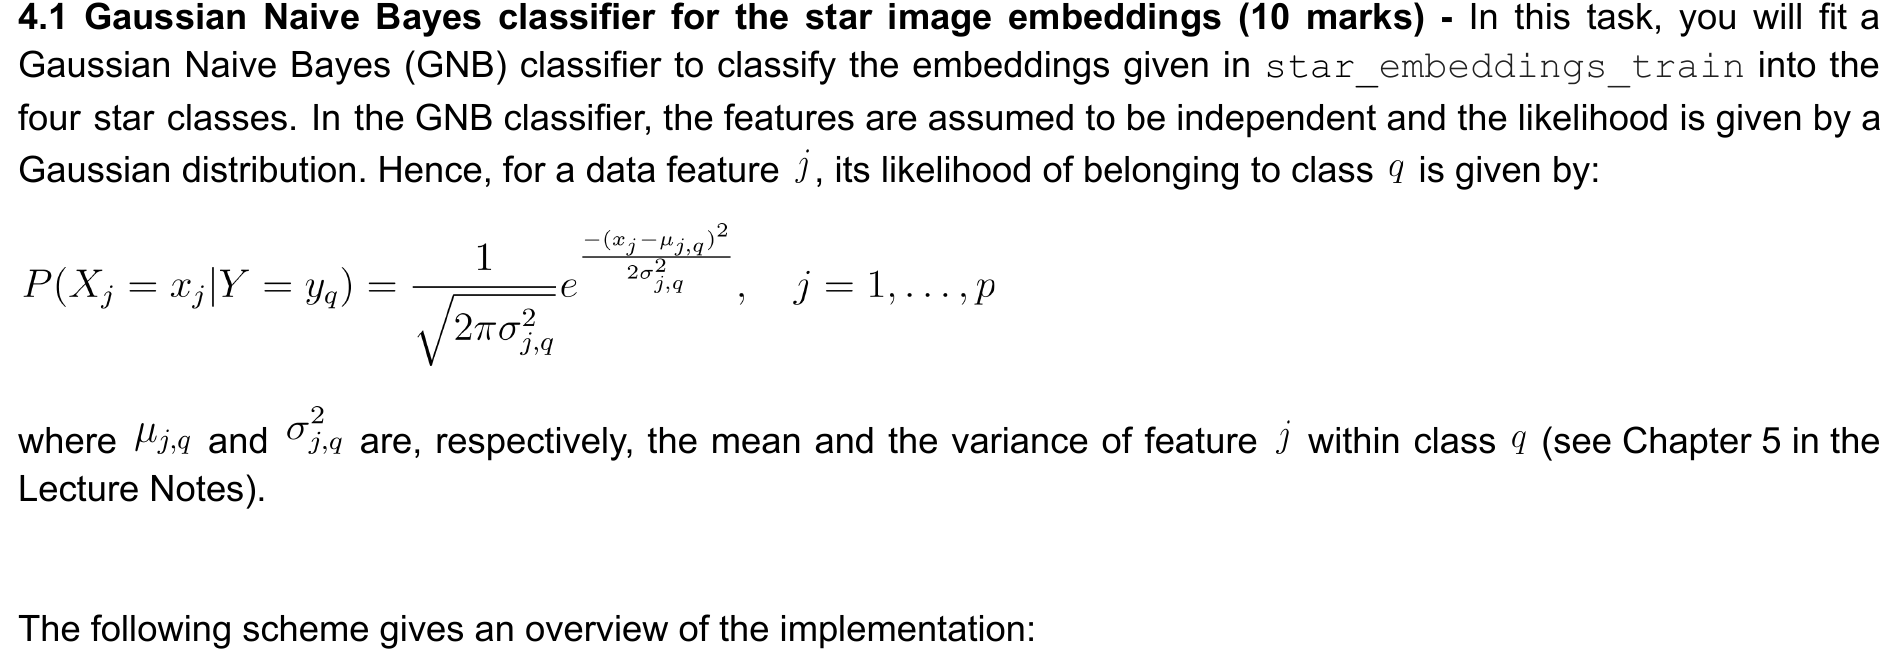

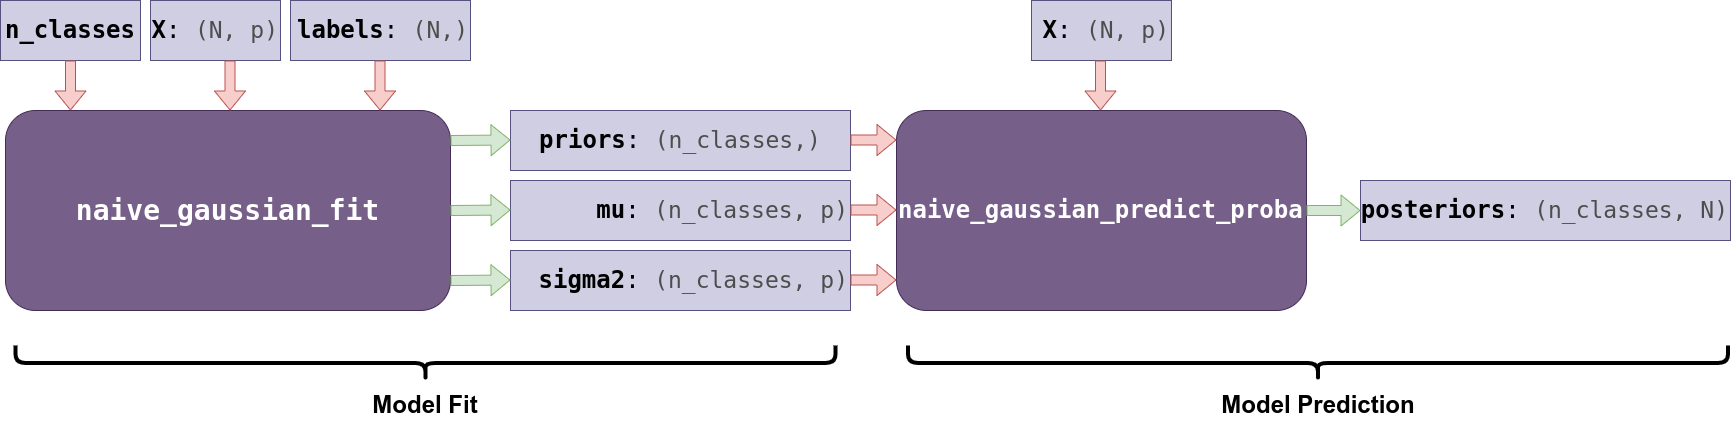

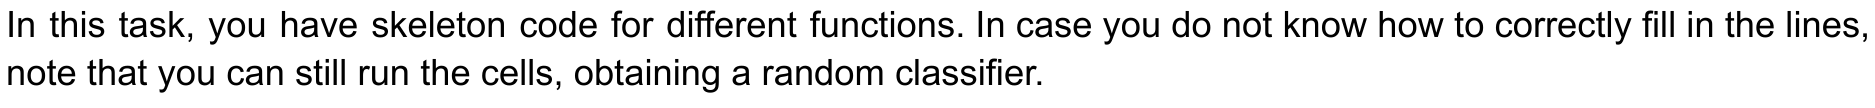


#### **4.1.1 (3 marks)**

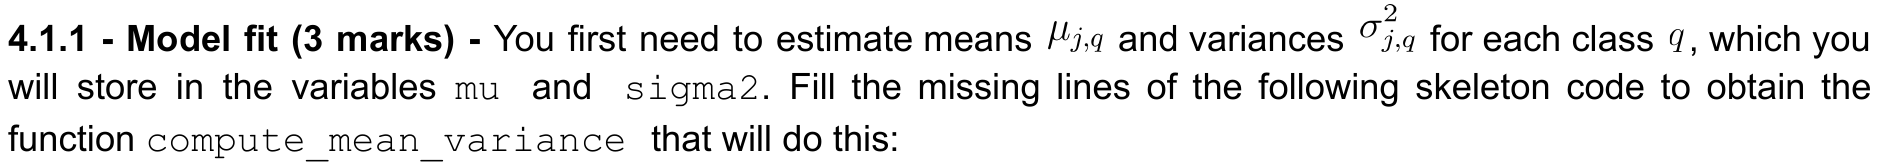

In [63]:
# EDIT THIS FUNCTION.
def compute_mean_variance(n_classes, X, labels):
    """
    Compute the mean and the variance of samples with respect to each class.

    Args:
        n_classes (int): total number of classes.
        X (np.ndarray): data points, with shape (N, p)
        labels (np.ndarray): class labels for each sample in X, with shape (N,),
            while each label value belongs to {0, 1, ..., n_classes - 1}.

    Returns:
        mu: the mean of the classes, with shape (n_classes, p).
        sigma2: the variance of the classes, with shape (n_classes, p).

    """
    N, p = X.shape

    mu = np.zeros((n_classes, p))
    sigma2 = np.ones((n_classes, p))

    for label in range(n_classes):
        X_c = X[labels == label] # <-- EDIT THIS LINE
        mu[label] = X_c.mean(axis=0) # <-- EDIT THIS LINE
        sigma2[label] = X_c.var(axis=0) # <-- EDIT THIS LINE

    return mu, sigma2

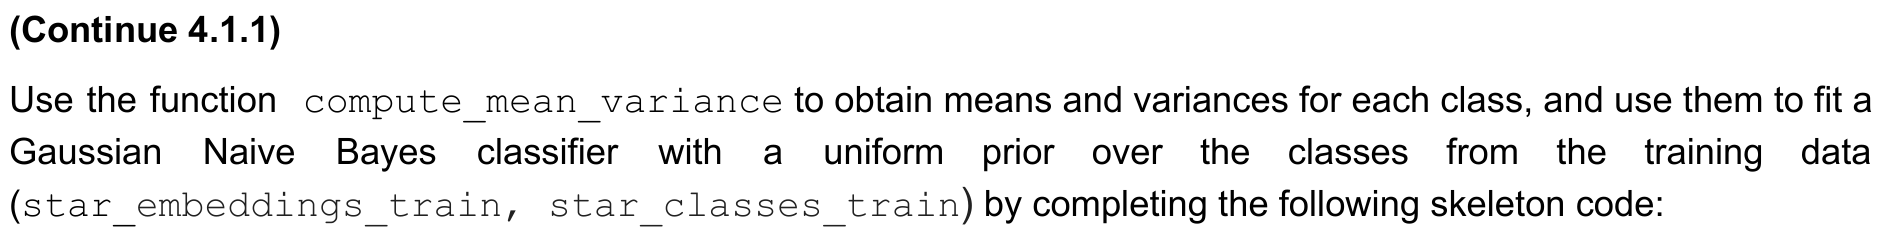

In [64]:
# EDIT THIS FUNCTION
def naive_gaussian_fit(n_classes, X, y):
    """Use training data to fit the Gaussian Naive Bayes classifier parameters.

    Args:
        n_classes (int): total number of classes.
        X (np.array): The samples array, shape: (N, p).
        y (np.array): Categorical target array, shape: (N, ). Each category value
            belongs to {0, 1, ..., n_classes - 1}.

    Returns:
        prior (np.array): Prior distribution of classes, shape: (n_classes, ).
        mu (np.ndarray): the mean for each class, shape: (n_classes, p)
        sigma2 (np.ndarray): the variance for each class, shape: (n_classes, p)
    """
    p = X.shape[1]

    # define prior
    prior = np.asarray([np.sum(y == c) / len(y) for c in range(n_classes)])  # <-- EDIT THIS LINE

    mu, sigma2 = compute_mean_variance(n_classes, X, y)

    return prior, mu, sigma2


In [65]:
prior, mu_train, sigma2_train = naive_gaussian_fit(4, star_embeddings_train, star_classes_train)

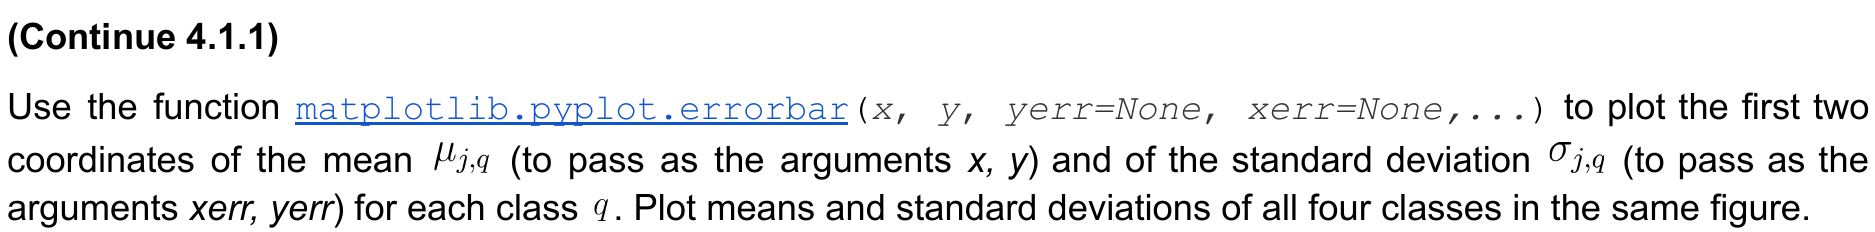

In [17]:
# uncomment the line below (CTRL+/) and execute (SHIFT+Enter) to get the documentation
# ?plt.errorbar

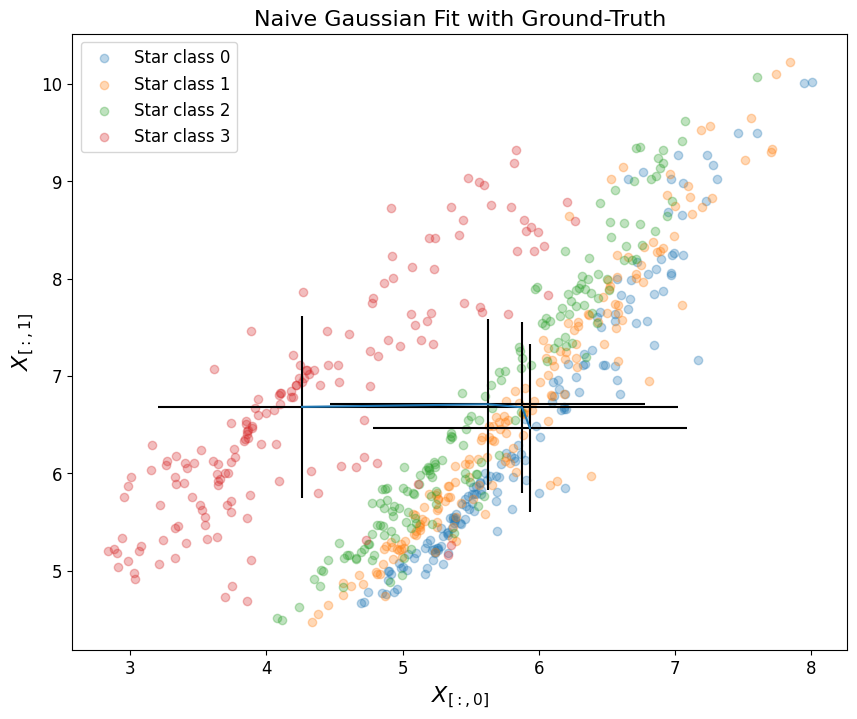

In [72]:
plt.figure(figsize=(10, 8))

for label in np.unique(star_classes_train):
    plt.scatter(star_embeddings_train[star_classes_train == label, 0],
                star_embeddings_train[star_classes_train == label, 1],
                label=f'Star class {label}', alpha=0.3)

plt.legend()

sigma_train = np.sqrt(sigma2_train)
plt.errorbar(x=mu_train[:, 0], y=mu_train[:, 1],
             yerr=np.sqrt(sigma_train)[:, 0],
             xerr=np.sqrt(sigma_train)[:, 1],
             ecolor="black")
plt.title("Naive Gaussian Fit with Ground-Truth")
plt.xlabel('$X_{[:,0]}$')
plt.ylabel('$X_{[:,1]}$')
plt.show()

#### **4.1.2 (7 marks)**

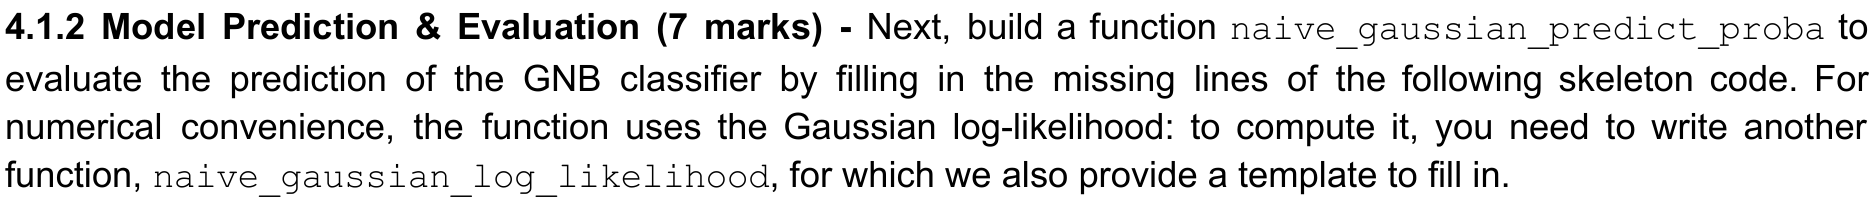

In [19]:

# EDIT THIS FUNCTION
def naive_gaussian_log_likelihood(X, mu_i, sigma2_i):
    """
    Compute the Gaussian log-likelihood for each multi-dimensional sample in X,
    with the naive assumption of independence across features (dimensions).

    Args:
        X (np.ndarray): the data array, shape: (N, p).
        mu_i (np.ndarray): the class mean, shape: (p, )
        sigma2_i (np.ndarray): the class variance, shape: (p, )

    Returns:
        (np.ndarray): the log-likelihood for each sample, shape: (N, ).
    """
    return - np.sum(np.log(2 * np.pi * sigma2_i) / 2) - np.sum( (X - mu_i) ** 2 / (2 * sigma2_i), axis=1) # <-- EDIT THIS LINE


# EDIT THIS FUNCTION
def naive_gaussian_predict_proba(prior, mu, sigma2, X):
    """Predict the posterior probabilities of the classes with the Gaussian Naive Bayes.

    Args:
        prior (np.array): Prior distribution of classes, shape: (n_classes, ).
        mu (np.ndarray): the mean for each class, shape: (n_classes, p)
        sigma2 (np.ndarray): the variance for each class, shape: (n_classes, p)
        X (np.array): The samples array, shape: (N, p).


    Returns:
        posteriors (np.array): Posterior distribution of samples, shape: (n_classes, N).
    """
    n_classes, N = len(prior), len(X)

    # define likelihood P(x|y) shape: (n_classes, N)
    log_lk = np.vstack([naive_gaussian_log_likelihood(X, mu_i, sigma2_i) for (mu_i, sigma2_i) in zip(mu, sigma2)])

    # compute log-posterior
    log_posterior = log_lk + np.log(prior).reshape(-1, 1)  # <-- EDIT THIS LINE

    # to ensure numerical stability when computing the normalisation factor, we can subtract the maximum log posterior
    # this change will be re-absorbed into the normalisation factor without loss of generality
    log_posterior = log_posterior - log_posterior.max(axis=0)

    # normalize to get full posterior distribution
    normalize_term = np.exp(log_posterior).sum(axis=0) # <-- EDIT THIS LINE
    posteriors = np.exp(log_posterior) / normalize_term.reshape(1, -1) # <-- EDIT THIS LINE

    return posteriors

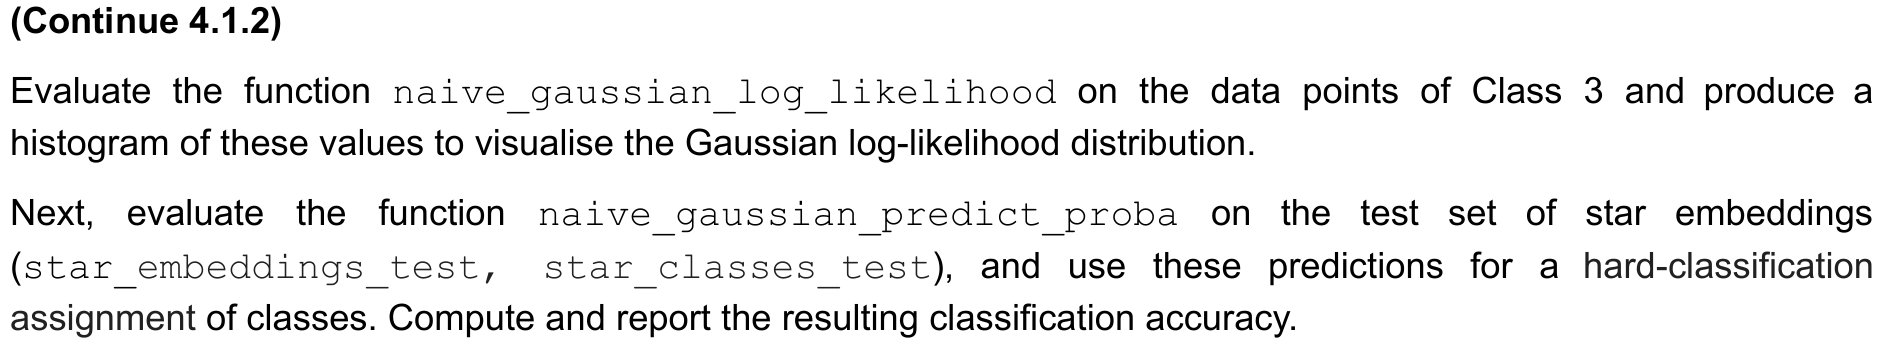

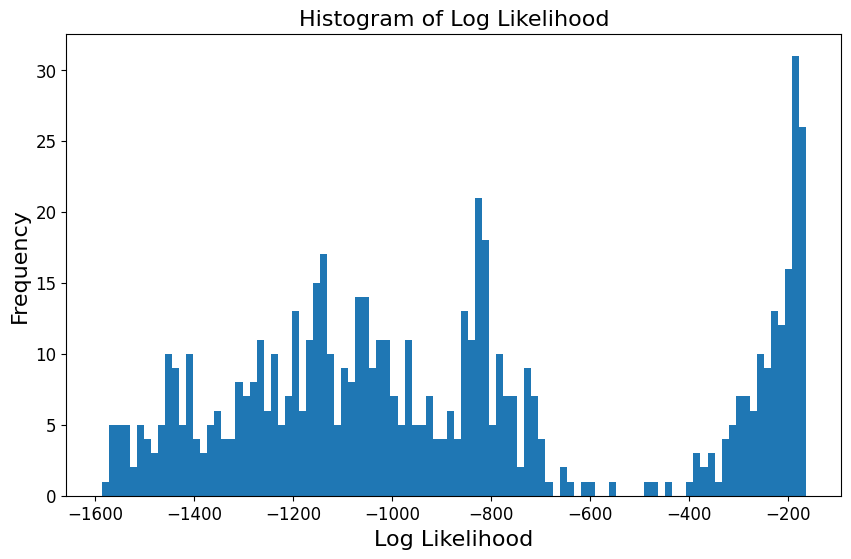

In [20]:
# applying naive_gaussian_log_likelihood
log_likelihood = naive_gaussian_log_likelihood(star_embeddings_train, mu_train[3], sigma_train[3])
# produce histogram
plt.figure(figsize=(10, 6))
plt.hist(log_likelihood, bins=100)
plt.xlabel('Log Likelihood')
plt.ylabel('Frequency')
plt.title('Histogram of Log Likelihood')
plt.show()

In [21]:
posteriors_test = naive_gaussian_predict_proba(prior, mu_train, sigma2_train, star_embeddings_test)

Now I define a function `naive_gaussian_hard_accuracy` to estimate the prediction accuracy using the hard-classifications.

In [22]:
def naive_gaussian_hard_accuracy(posteriors, y):
    """
    Estimate the prediction accuracy using the hard-classifications (i.e. via argmax).

    Args:
        posteriors (np.ndarray): Posterior distribution of samples, shape: (n_classes, N).
        y (np.ndarray): ground-truth labels, shape: (N, ).

    Returns:
        accuracy (float): the accuracy of predictions.
    """
    y_hat_hard = posteriors.argmax(axis=0)
    accuracy = np.mean(y_hat_hard == y)
    return accuracy

In [23]:
print('The prediction accuracy using hard-classification is: ' + str(naive_gaussian_hard_accuracy(posteriors_test, star_classes_test)))

The prediction accuracy using hard-classification is: 0.96875


<a name="task-42"></a>


### **4.2 (5 marks, 3rd-year students only)**   [(index)](#index-task-42)


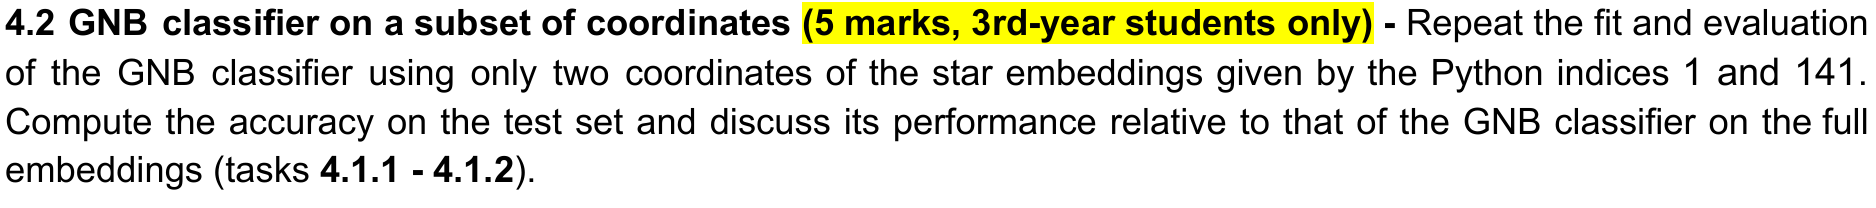

In [24]:
# subset the data
indices = [1, 141]
embeddings_subset_train = star_embeddings_train[:, indices]
embeddings_subset_test = star_embeddings_test[:, indices]
# fit the model
prior, mu_train, sigma2_train = naive_gaussian_fit(4, embeddings_subset_train, star_classes_train)
# predict on thes test set
posteriors_test = naive_gaussian_predict_proba(prior, mu_train, sigma2_train, embeddings_subset_test)
# calculate and return the accuracy
print('The prediction accuracy using hard-classification is: ' + str(naive_gaussian_hard_accuracy(posteriors_test, star_classes_test)))

The prediction accuracy using hard-classification is: 0.21875


The predicted accuracy is much lower when the model is trained on only the specified two coordinates of the star embeddings compared with the full set of embeddings. This demonstrates that the information contained in the specified features is not sufficient to successfully classify the samples using the GNB classifier.

<a name="task-42m"></a>


### **4.2 (5 marks, MSc/4th-year students only)**   [(index)](#index-task-42m)

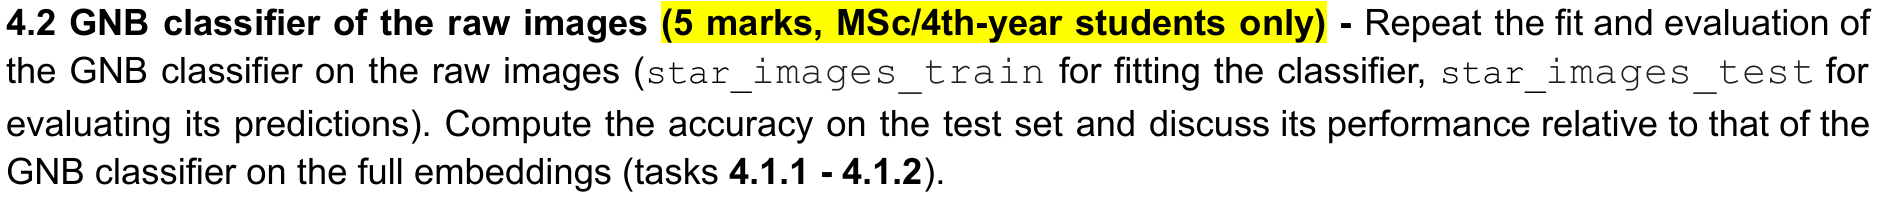

In [25]:
# we need to flatten the images
raw_images_train = star_images_train.reshape(648, 32 * 32)
raw_images_test = star_images_test.reshape(32, 32 * 32)
# fit the model
prior, mu_train, sigma2_train = naive_gaussian_fit(4, raw_images_train, star_classes_train)
# predict on thes test set
posteriors_test = naive_gaussian_predict_proba(prior, mu_train, sigma2_train, raw_images_test)
# calculate and return the accuracy
print('The prediction accuracy using hard-classification is: ' + str(naive_gaussian_hard_accuracy(posteriors_test, star_classes_test)))

The prediction accuracy using hard-classification is: 0.4375


The predicted accuracy is much lower when the model is trained on the raw images of the stars compared with the embeddings. This demonstrates that the representation of the stars given by the embeddings, provided by deep neural networks, captures some intrinsic structure of the data facilitating downstream tasks like classification.

 Given the assumptions of GNB, namely that features are conditionally independent given the class feature and that features follow a Gaussian distribution, this suggests:

 * the raw features of the images are not independent given the class (which seems reasonable)

and/or

 * the raw features do not follow a Gaussian distribution - which again seems plausible.

I consider histograms of features from both datasets to investigate this last point further.

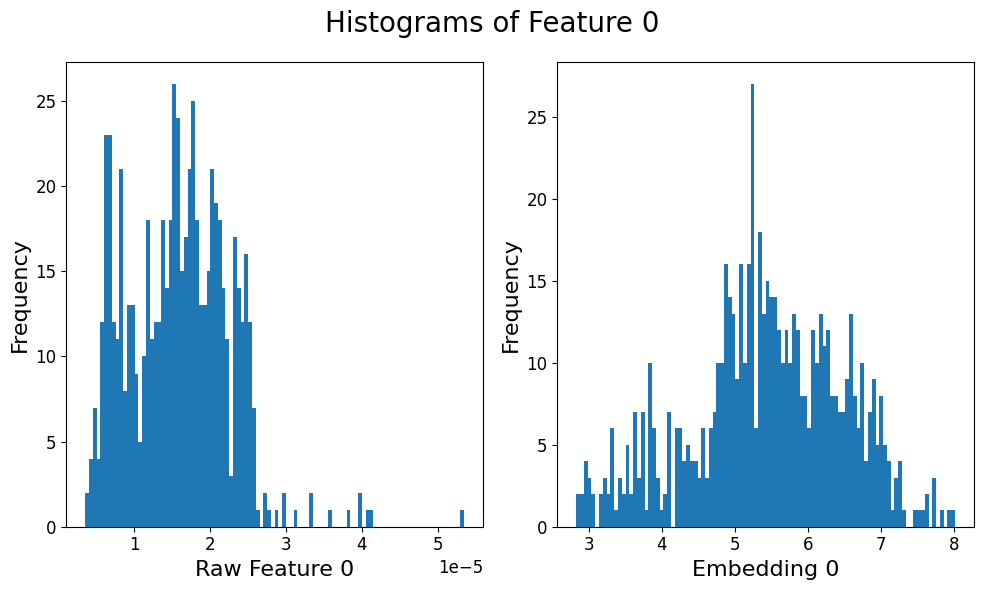

In [26]:
# plot two histograms side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Histograms of Feature 0')

ax1.hist(raw_images_train[:, 0], bins=100)
ax1.set_xlabel('Raw Feature 0')
ax1.set_ylabel('Frequency')

ax2.hist(star_embeddings_train[:, 0], bins=100)
ax2.set_xlabel('Embedding 0')
ax2.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

Plotting the histograms of the first features of both datasets shows, for this feature at least, the embedding feature appears more Gaussian in nature than the raw image feature, perhaps contributing to the superior performance of GNB on the embeddings data.



---



<a name="task-5"></a>

## Task 5:  Soft-margin linear Support Vector Machine (SVM) classifier (15 marks) [(index)](#index-task-5)

<a name="task-51"></a>

### **5.1 (10 marks)**   [(index)](#index-task-51)

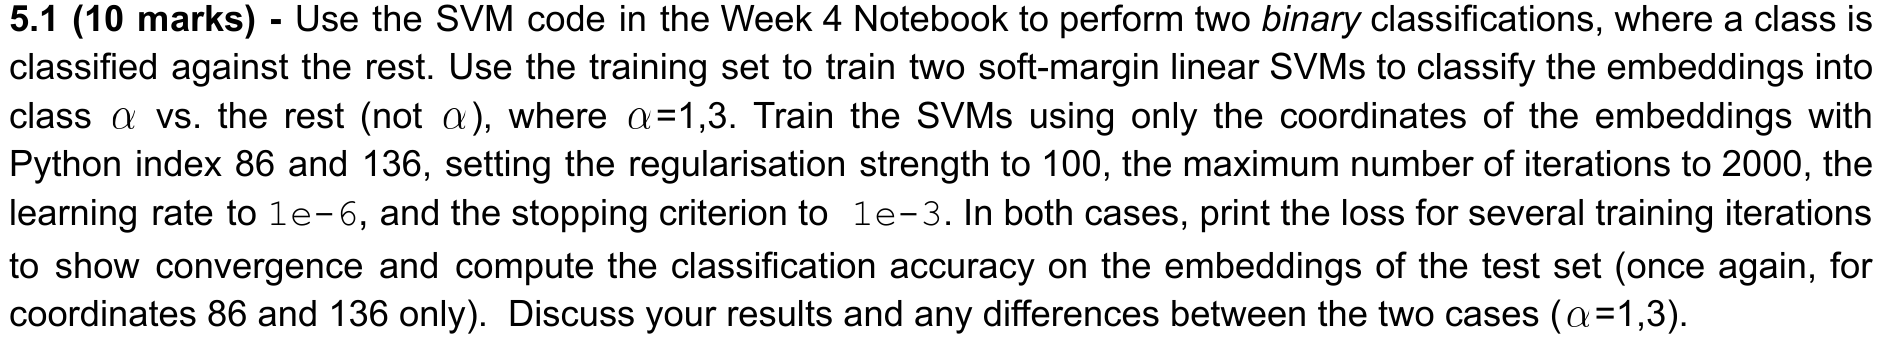

I first import function from SVM notebook:

In [27]:
def standardise(X, X_train_=None):
    """
    Standardise features.

    Parameters:
        X (np.array): Feature matrix.
        X_train_ (np.array): An optional feature matrix to compute the statistics
            from before applying it to X. If None, just use X to compute the statistics.

    Returns:
        X_std (np.array): Standardised feature matrix
    """
    if X_train_ is None:
        X_train_ = X

    mu = np.mean(X_train_, axis=0, keepdims=True)
    sigma = np.std(X_train_, axis=0, keepdims=True)
    sigma = np.where(sigma == 0, 1, sigma)
    X_std = (X - mu) / sigma

    return X_std

def calculate_loss_gradient(w, X_batch, y_batch, regul_strength=1e6):
    """
    Calculate gradient of the loss.

    Parameters:
        w (np.array): Vector of weights (incl. bias).
        X_batch (np.array): Batch of input features.
        y_batch (np.array): Batch of labels.
        regul_strength (float): Regularisation parameter.

    Returns:
        grad_w (float): Gradient of the loss with respect to w.

    """

    # If only one sample is passed
    if type(y_batch) == np.float64:
        y_batch = np.asarray([y_batch])
        X_batch = np.asarray([X_batch])  # gives multidimensional array

    distance = 1 - (y_batch * (X_batch @ w))
    dw = np.zeros(len(w))

    we = w.copy() # So as not to overwrite w
    we[-1] = 0 # So as not to have b in its derivative when adding the weights in di

    for ind, d in enumerate(distance):
        if max(0, d) > 0: ## <-- SOLUTION
            dw += - regul_strength * y_batch[ind] * X_batch[ind] ## <-- SOLUTION
    dw += we

    dw /= len(y_batch) # average

    return dw

def compute_loss(w, X, y, regul_strength=1e5):
    """
    Compute the loss function for linear SVM.

    Parameters:
        w (np.array): Vector of weights (incl. bias).
        X (np.array): Input features.
        y (np.array): Labels.
        regul_strength (float): Regularisation parameter.

    Returns:
        loss (float): Loss function as given by the equation above.

    """

    n = X.shape[0]
    distances = 1 - y * (X @ w)  ## <-- SOLUTION
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = distances.sum() ## <-- SOLUTION

    # calculate loss
    return 0.5 * np.dot(w, w) + regul_strength * hinge - 0.5 * w[-1] ** 2

def mini_batch_gradient_descent(X, y, batch_size=32, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=1e6, print_outcome=False):
    """
    Performs mini-batch stochastic gradient descent to optimise weights.

    Parameters:
        X (np.array): The feature matrix.
        y (np.array): The target labels.
        batch_size (int): Size of each mini-batch.
        max_iterations (int): Maximum number of iterations.
        stop_criterion (float): Percentage change in loss function to determine convergence.
        learning_rate (float): Learning rate for gradient updates.
        regul_strength (float): Regularisation parameter
        print_outcome (bool): Whether to print progress during training.

    Returns:
        weights (np.array): Optimised weights.
        loss_history (list): History of loss.
        iteration_list (list): List of iteration numbers corresponding to the loss values.

    """
    # Initialise weights to zero
    weights = np.zeros(X.shape[1])
    nth = 0
    prev_loss = np.inf  # Initialise starting loss as infinity
    loss_history = []  # Track loss values
    iteration_list = []  # Track iteration numbers

    for iteration in range(1, max_iterations+1):
        # Shuffle data to prevent repeating update cycles
        indices = np.random.permutation(len(y))
        X_shuffled, y_shuffled = X[indices], y[indices] ## <-- SOLUTION

        # Create mini-batches
        for start_idx in range(0, len(y), batch_size):
            end_idx = start_idx + batch_size
            X_batch = X_shuffled[start_idx:end_idx] ## <-- SOLUTION
            y_batch = y_shuffled[start_idx:end_idx] ## <-- SOLUTION

            # Compute the gradient for the mini-batch
            gradient = calculate_loss_gradient(weights, X_batch, y_batch, regul_strength) ## <-- SOLUTION

            # Update weights
            weights = weights - (learning_rate * gradient) ## <-- SOLUTION

        # Check for convergence at 2^nth iteration or last iteration
        if iteration == 2**nth or iteration == max_iterations:
            # Compute the current loss
            loss = compute_loss(weights, X, y, regul_strength) ## <-- SOLUTION
            if print_outcome:
                print(f'Iteration: {iteration}, Loss: {loss:.6f}')

            # Check if the stop criterion is met
            if abs(prev_loss - loss) < stop_criterion * prev_loss: ## <-- SOLUTION
                return weights, loss_history, iteration_list

            # Update tracking variables
            prev_loss = loss
            iteration_list.append(iteration)
            loss_history.append(loss)
            nth += 1

    return weights, loss_history, iteration_list

## EDIT THIS FUNCTION
def score(w, X, y):
    """
    Computes the mean accuracy.

    Parameters:
        w (np.array): Vector of weights (incl. bias).
        X (np.array): The feature matrix.
        y (np.array): The target labels.

    Returns:
        mean_accuracy (np.array): Accuracy score.

    """
    y_preds = np.sign(X @ w)
    mean_accuracy = np.mean(y_preds == y) ## <-- SOLUTION

    return mean_accuracy

Here, the training data come from two features of the embeddings and I need to select them out. Also, I are doing binary classification for "one class vs other classes".

In [28]:
X_train = star_embeddings_train[:,[86, 136]]
X_test = star_embeddings_test[:,[86, 136]]
X_test = standardise(X_test, X_train)
X_train = standardise(X_train)
X_train_intercept = np.hstack((X_train, np.ones((len(X_train),1)) ))
X_test_intercept = np.hstack((X_test, np.ones((len(X_test),1)) ))

Class 1 vs others:

In [29]:
y_train_1vsrest = star_classes_train.copy()
for i in range(len(star_classes_train)):
  if star_classes_train[i] == 1:
    y_train_1vsrest[i] = 1
  else:
    y_train_1vsrest[i] = -1
y_test_1vsrest = star_classes_test.copy()
for i in range(len(star_classes_test)):
  if star_classes_test[i] == 1:
    y_test_1vsrest[i] = 1
  else:
    y_test_1vsrest[i] = -1

In [30]:
# Training the model
regul_strength = 100
w, loss_history, iterations = mini_batch_gradient_descent(X_train_intercept, y_train_1vsrest, max_iterations=2000, stop_criterion=1e-3, learning_rate=1e-5, regul_strength=regul_strength, print_outcome=True)
print('Training finished.')

Iteration: 1, Loss: 64264.813889
Iteration: 2, Loss: 63723.008579
Iteration: 4, Loss: 62648.553211
Iteration: 8, Loss: 60497.449411
Iteration: 16, Loss: 56218.729156
Iteration: 32, Loss: 48132.032990
Iteration: 64, Loss: 44084.411190
Iteration: 128, Loss: 37650.484542
Iteration: 256, Loss: 34409.824654
Iteration: 512, Loss: 34404.126992
Training finished.


In [31]:
print('Accuracy on training set: {}'.format(score(w, X_train_intercept, y_train_1vsrest)))
print('Accuracy on test set: {}'.format(score(w, X_test_intercept, y_test_1vsrest)))

Accuracy on training set: 0.7345679012345679
Accuracy on test set: 0.75


Class 3 vs others:

In [32]:
y_train_3vsrest = star_classes_train.copy()
for i in range(len(star_classes_train)):
  if star_classes_train[i] == 3:
    y_train_3vsrest[i] = 1
  else:
    y_train_3vsrest[i] = -1
y_test_3vsrest = star_classes_test.copy()
for i in range(len(star_classes_test)):
  if star_classes_test[i] == 3:
    y_test_3vsrest[i] = 1
  else:
    y_test_3vsrest[i] = -1

In [33]:
# Training the model
regul_strength = 100
w, loss_history, iterations = mini_batch_gradient_descent(X_train_intercept, y_train_3vsrest, max_iterations=2000, stop_criterion=1e-3, learning_rate=1e-5, regul_strength=regul_strength, print_outcome=True)
print('Training finished.')

Iteration: 1, Loss: 62760.425109
Iteration: 2, Loss: 60700.259077
Iteration: 4, Loss: 56621.173033
Iteration: 8, Loss: 48431.593498
Iteration: 16, Loss: 32036.381588
Iteration: 32, Loss: 13734.956291
Iteration: 64, Loss: 6819.133264
Iteration: 128, Loss: 3558.809790
Iteration: 256, Loss: 2003.136640
Iteration: 512, Loss: 1463.182101
Iteration: 1024, Loss: 1142.786944
Iteration: 2000, Loss: 1008.314178
Training finished.


In [34]:
print('Accuracy on training set: {}'.format(score(w, X_train_intercept, y_train_3vsrest)))
print('Accuracy on test set: {}'.format(score(w, X_test_intercept, y_test_3vsrest)))

Accuracy on training set: 0.9969135802469136
Accuracy on test set: 0.96875


I see that the binary classification between class 3 and others has higher accuracy on both traning and test data compared to that between class 1 and others. This is interpretable and expected as can be seen from the previous plot that class 3 is more separated from the other classes.

<a name="task-52"></a>

### **5.2 (5 marks, 3rd-year students only)**   [(index)](#index-task-52)


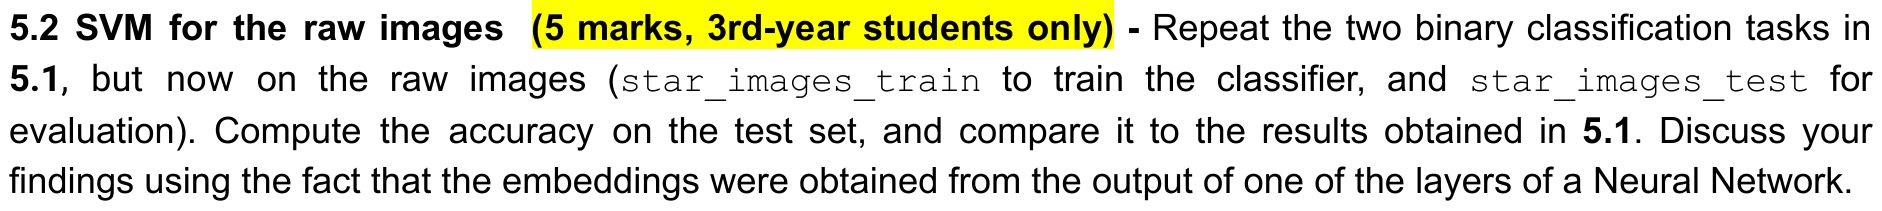

I repeat the binary classifications with the raw images now. I first need to flatten the images to produce training and test sets. Since each image have 32*32 = 1024 pixels, I will reshape them to have 1024 features.

In [35]:
X_img_train = star_images_train.reshape(len(star_images_train),1024)
X_img_test = star_images_test.reshape(len(star_images_test),1024)
X_img_test = standardise(X_img_test, X_img_train)
X_img_train = standardise(X_img_train)
X_img_train_intercept = np.hstack((X_img_train, np.ones((len(X_img_train),1)) ))
X_img_test_intercept = np.hstack((X_img_test, np.ones((len(X_img_test),1)) ))

Class 1 vs others

In [36]:
# Training the model
regul_strength = 100
w, loss_history, iterations = mini_batch_gradient_descent(X_img_train_intercept, y_train_1vsrest, max_iterations=2000, stop_criterion=1e-3, learning_rate=1e-5, regul_strength=regul_strength, print_outcome=True)
print('Training finished.')

Iteration: 1, Loss: 60077.273769
Iteration: 2, Loss: 57559.831410
Iteration: 4, Loss: 54837.217989
Iteration: 8, Loss: 51551.509503
Iteration: 16, Loss: 47502.119523
Iteration: 32, Loss: 44312.204758
Iteration: 64, Loss: 39323.999696
Iteration: 128, Loss: 35736.577162
Iteration: 256, Loss: 33183.825291
Iteration: 512, Loss: 32347.176582
Iteration: 1024, Loss: 31805.208792
Iteration: 2000, Loss: 30942.217544
Training finished.


In [37]:
print('Accuracy on training set: {}'.format(score(w, X_img_train_intercept, y_train_1vsrest)))
print('Accuracy on test set: {}'.format(score(w, X_img_test_intercept, y_test_1vsrest)))

Accuracy on training set: 0.7669753086419753
Accuracy on test set: 0.8125


Class 3 vs others

In [38]:
# Training the model
regul_strength = 100
w, loss_history, iterations = mini_batch_gradient_descent(X_img_train_intercept, y_train_3vsrest, max_iterations=2000, stop_criterion=1e-3, learning_rate=1e-5, regul_strength=regul_strength, print_outcome=True)
print('Training finished.')

Iteration: 1, Loss: 53708.140111
Iteration: 2, Loss: 43187.474083
Iteration: 4, Loss: 30624.264336
Iteration: 8, Loss: 20098.500504
Iteration: 16, Loss: 9012.857801
Iteration: 32, Loss: 3298.783830
Iteration: 64, Loss: 355.553852
Iteration: 128, Loss: 0.227698
Iteration: 256, Loss: 0.227279
Iteration: 512, Loss: 0.226408
Iteration: 1024, Loss: 0.226058
Iteration: 2000, Loss: 0.223162
Training finished.


In [39]:
print('Accuracy on training set: {}'.format(score(w, X_img_train_intercept, y_train_3vsrest)))
print('Accuracy on test set: {}'.format(score(w, X_img_test_intercept, y_test_3vsrest)))

Accuracy on training set: 1.0
Accuracy on test set: 1.0


I observe that, for both binary classifications, the SVM classifier with raw image leads to better training and test accuracy than the one with embeddings.  Noticing that the SVM produces a linear decision boundary, this observation might indicate that raw images are more linearly separable than the embeddings (relatively to this binary classification problem). The deep neural networks might have learnt non-linear transformations of the data that compromised slightly their linear separability (again, relatively to this binary classification problem).

<a name="task-52m"></a>

### **5.2 (5 marks, MSc/4th-year students only)**   [(index)](#index-task-52m)

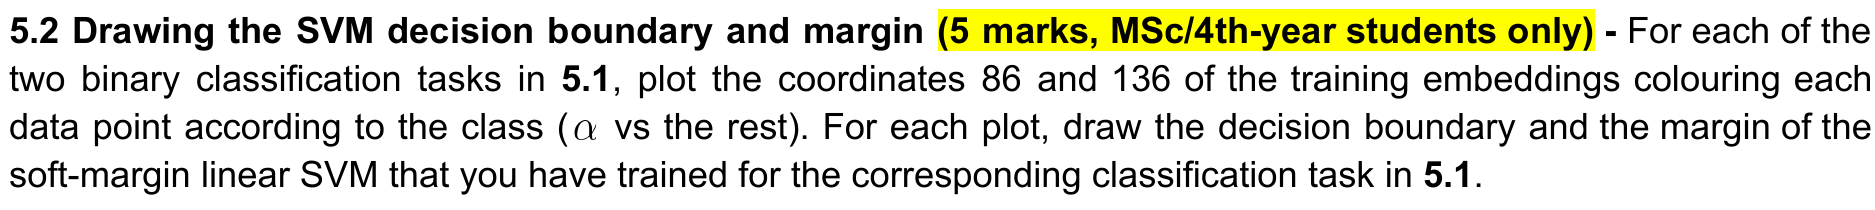

I write a function to plot the decision boundary of SVM, the two data coordinates and their class labels.

In [40]:
def plot_decision_boundary_and_margins(w, X, y, ind1, ind2):
    """
    Plot data and decision boundary.

    Parameters:
        w: Vector of weights.
        X: The feature matrix.
        y: The target labels.
        ind1, ind2: Indices of the two features to plot.

    """


    # Extract b from w and calculate slope (m) and intercept (c) for decision boundary
    b = w[-1]
    #w = w[:-1]
    slope = -w[ind1] / w[ind2]
    intercept = -b / w[ind2]

    # Calculate margin offset
    margin = 1 / np.linalg.norm(w)

    # Generate x-values from the dataset range for plotting
    x_vals = np.linspace(X[:, ind1].min(), X[:, ind1].max(), 100)

    # Calculate decision boundary and margins
    db = slope * x_vals + intercept
    margin_up = db + margin
    margin_down = db - margin

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, ind1], X[:, ind2], c=y, cmap='bwr', alpha=0.5)
    plt.plot(x_vals, db, 'k-', label='Decision Boundary')
    plt.plot(x_vals, margin_up, 'k--', label='Margin')
    plt.plot(x_vals, margin_down, 'k--')
    plt.fill_between(x_vals, margin_down, margin_up, color='grey', alpha=0.3)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [41]:
y_train_1vsrest = star_classes_train.copy()
for i in range(len(star_classes_train)):
  if star_classes_train[i] == 1:
    y_train_1vsrest[i] = 1
  else:
    y_train_1vsrest[i] = -1
y_test_1vsrest = star_classes_test.copy()
for i in range(len(star_classes_test)):
  if star_classes_test[i] == 1:
    y_test_1vsrest[i] = 1
  else:
    y_test_1vsrest[i] = -1

In [42]:
# Training the model
regul_strength = 100
w, loss_history, iterations = mini_batch_gradient_descent(X_train_intercept, y_train_1vsrest, max_iterations=2000, stop_criterion=1e-3, learning_rate=1e-5, regul_strength=regul_strength, print_outcome=False)
print('Training finished.')

Training finished.


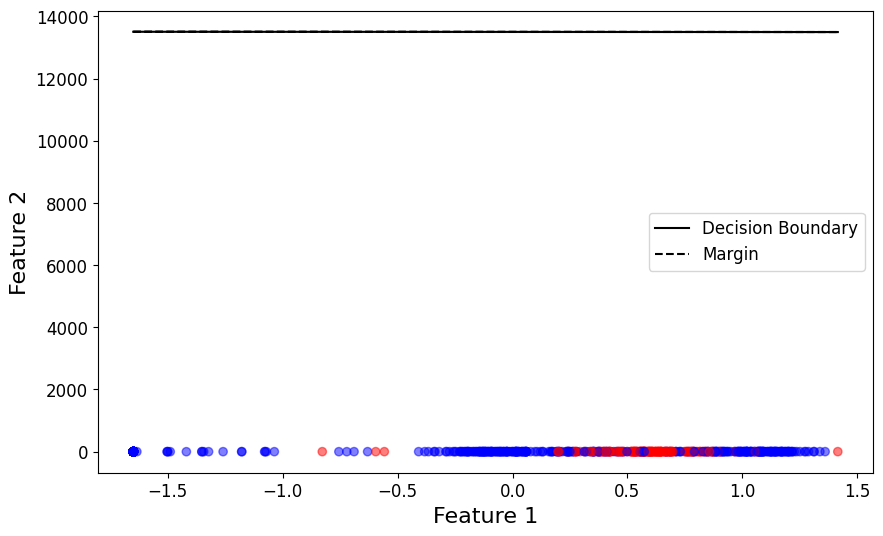

In [43]:
plot_decision_boundary_and_margins(w, X_train_intercept, y_train_1vsrest, 0, 1)

In [44]:
y_train_3vsrest = star_classes_train.copy()
for i in range(len(star_classes_train)):
  if star_classes_train[i] == 3:
    y_train_3vsrest[i] = 1
  else:
    y_train_3vsrest[i] = -1
y_test_3vsrest = star_classes_test.copy()
for i in range(len(star_classes_test)):
  if star_classes_test[i] == 3:
    y_test_3vsrest[i] = 1
  else:
    y_test_3vsrest[i] = -1

In [45]:
# Training the model
regul_strength = 100
w, loss_history, iterations = mini_batch_gradient_descent(X_train_intercept, y_train_3vsrest, max_iterations=2000, stop_criterion=1e-3, learning_rate=1e-5, regul_strength=regul_strength, print_outcome=False)
print('Training finished.')

Training finished.


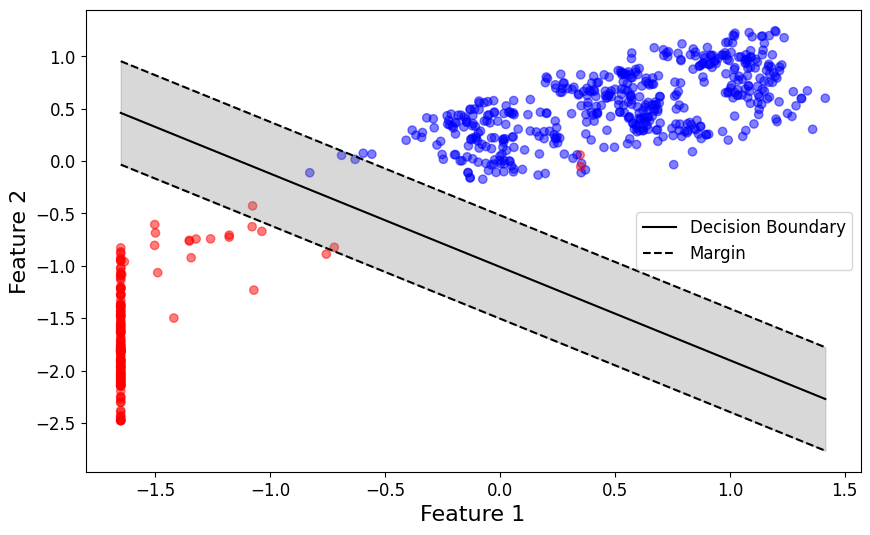

In [46]:
plot_decision_boundary_and_margins(w, X_train_intercept, y_train_3vsrest, 0, 1)

From the first plot, I can see that the binary classifier between class 1 and others are actually making the same prediction for all data points, resulting in the accuracies being ~75%, which simply reflects the class proportions. This is completely different in the second plot, namely the binary classification between class 3 and others is accurate (accuracy on test set ~97%); also visually I can see the decision boundary separates the two classes well.